In [62]:
# Basic DS/ML libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Pytorch libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader 
from torchvision import datasets, transforms
from torchvision.utils import make_grid

In [64]:
# For evaluation purpose
from sklearn.metrics import confusion_matrix

In [65]:
# Image(s) to Tensor(s)
transform = transforms.ToTensor()

In [66]:
train_data = datasets.FashionMNIST(root='../Data',train=True,download=True,transform=transform)
test_data = datasets.FashionMNIST(root='../Data',train=False,download=True,transform=transform)

In [67]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [68]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [69]:
label_names = ['T-shirt','Trouser','Sweater','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

In [70]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [71]:
example_batch = train_loader.__iter__()
images,labels = next(example_batch)

In [72]:
for l in labels:
    print(f"Label: {l}, Image of {label_names[l]}" )

Label: 5, Image of Sandal
Label: 2, Image of Sweater
Label: 3, Image of Dress
Label: 7, Image of Sneaker
Label: 4, Image of Coat
Label: 1, Image of Trouser
Label: 5, Image of Sandal
Label: 4, Image of Coat
Label: 2, Image of Sweater
Label: 5, Image of Sandal


In [73]:
images.shape

torch.Size([10, 1, 28, 28])

<p>10 Batch size</p>
<p>1 gray scale(Single Color channel)<p>
<p>28 x 28 dimension</p>

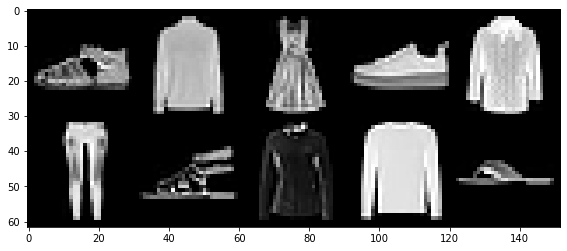

In [81]:
im = make_grid(images, nrow=5)
plt.figure(figsize=(12,4))

# Width, Height, Channel
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [82]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Convolution Layer
        # 1 color channel, 6 filters, 3x3 kernel,1 stride/step
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        
        # 6 input filters conv1, 16 filters, 3x3 kernel,1 stride
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        
        self.fc1 = nn.Linear(5*5*16, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = self.fc2(X)
        return F.log_softmax(X, dim=1)
    
torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

In [76]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [77]:
epochs = 5

for i in range(epochs):
    for X_train, y_train in train_loader:

        # Apply the model
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

/home/prabesh013/anaconda3/envs/mlenv/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [78]:
model.eval()

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_loader:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
        
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 8871/10000 =  88.710%
